In [62]:
%matplotlib inline
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense
from pandas.plotting import scatter_matrix 
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import balanced_accuracy_score
from tensorflow.keras.optimizers import Adam

In [63]:
df = pd.read_csv('V1_classification_lr3.csv')

print(df.dtypes)
df.head()
# df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [64]:
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

Выполним анализ корреляционной зависимости для целевого признака (target)

In [65]:
corr = df.corr()
corr["target"].sort_values(ascending=False)
print(corr["target"])

mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

Построим гистограммы распределения и плотнотей и зависимостей признаков

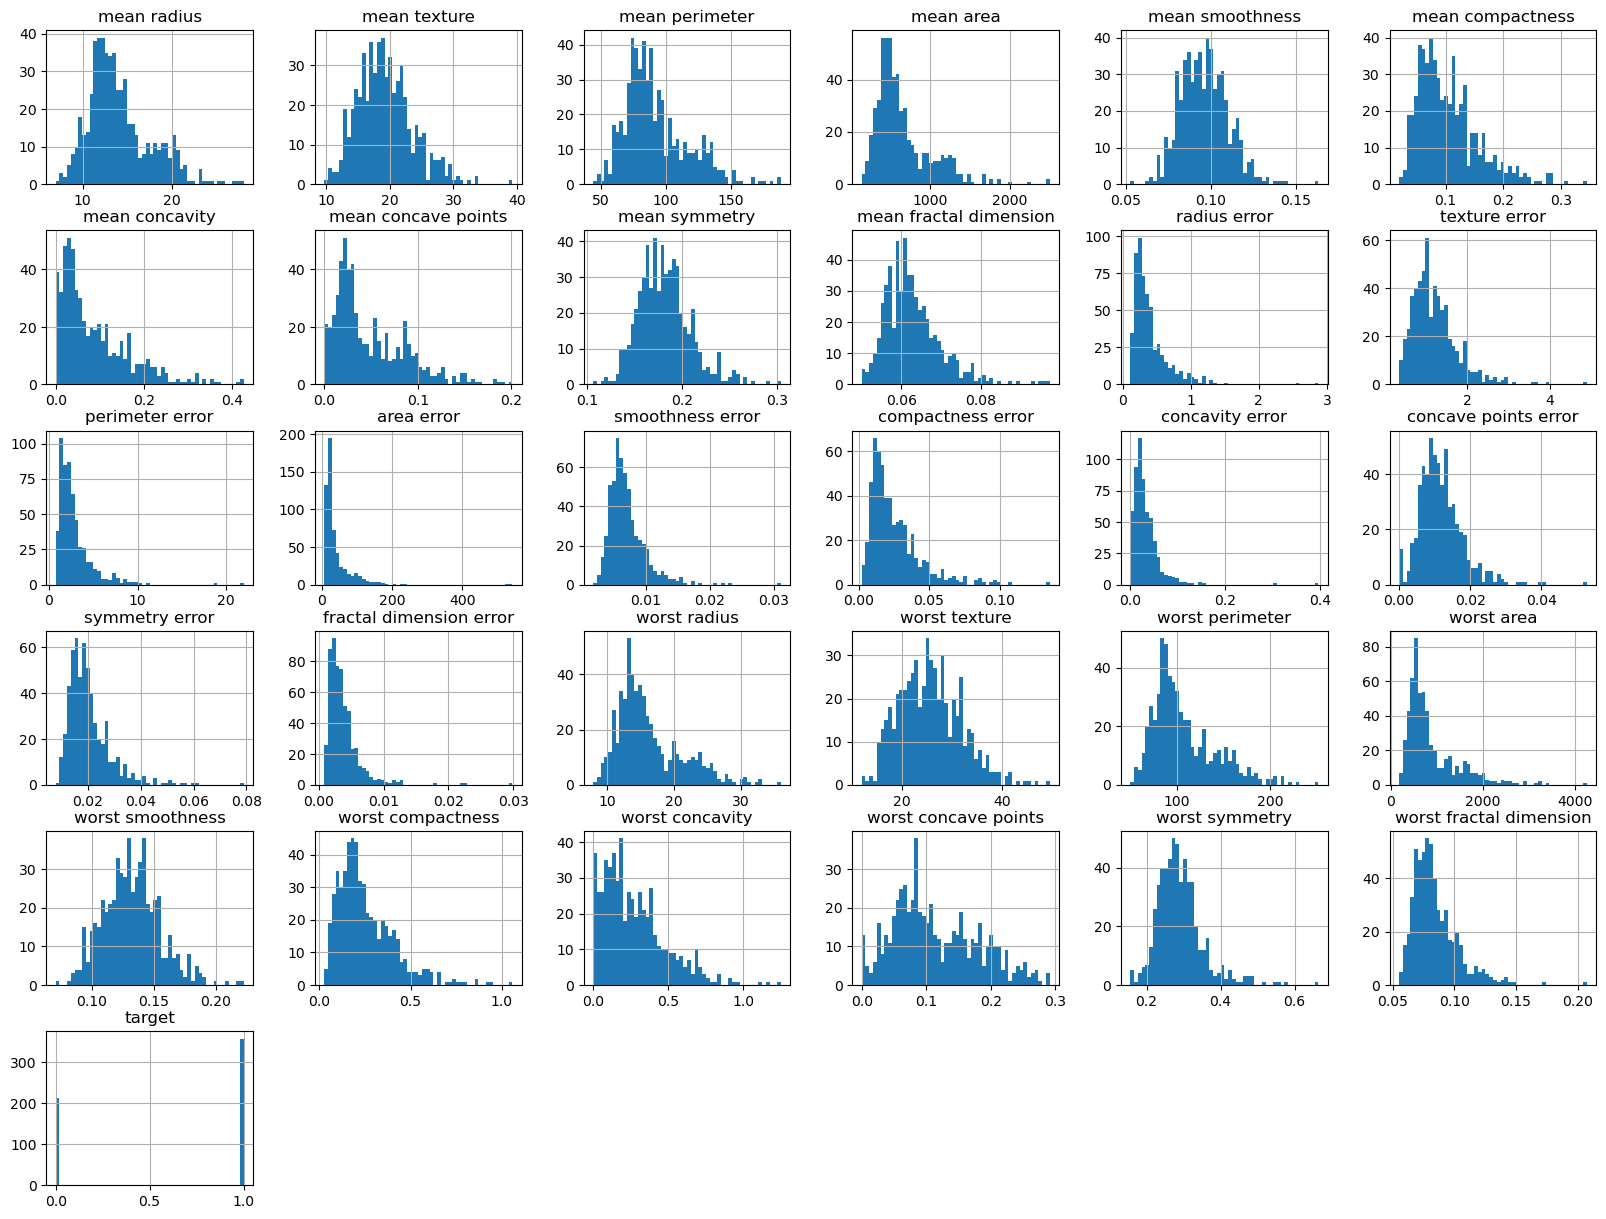

In [66]:
df.hist(bins=50,figsize=(20,15))
plt.show()

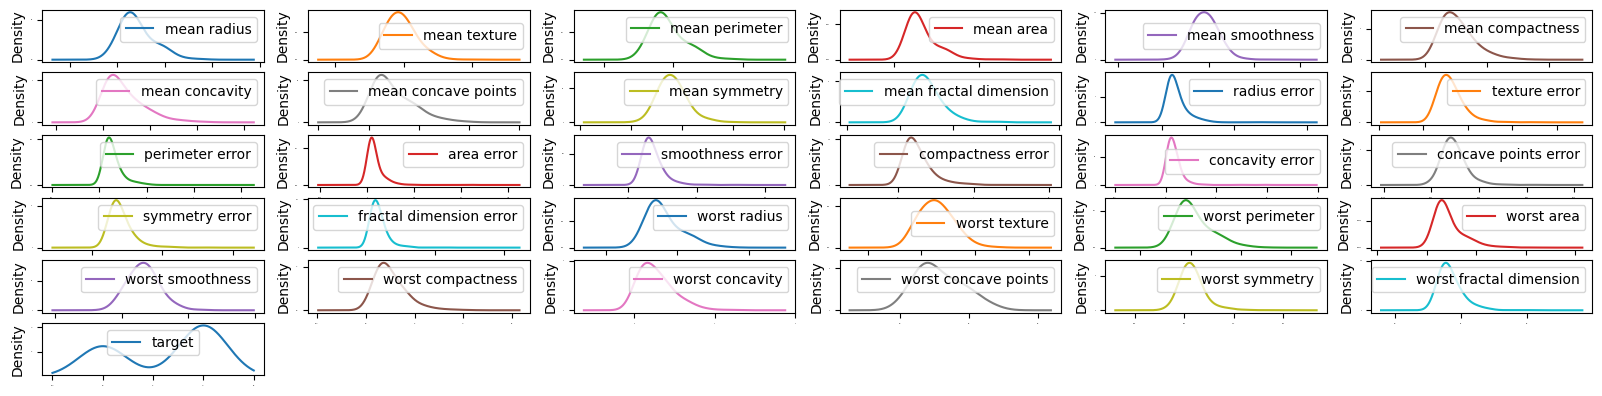

In [67]:
df.plot(kind='density', subplots=True, layout=(10,6), sharex=False, legend=True, fontsize=1, figsize=(20,8), bw_method=0.5)
plt.show()

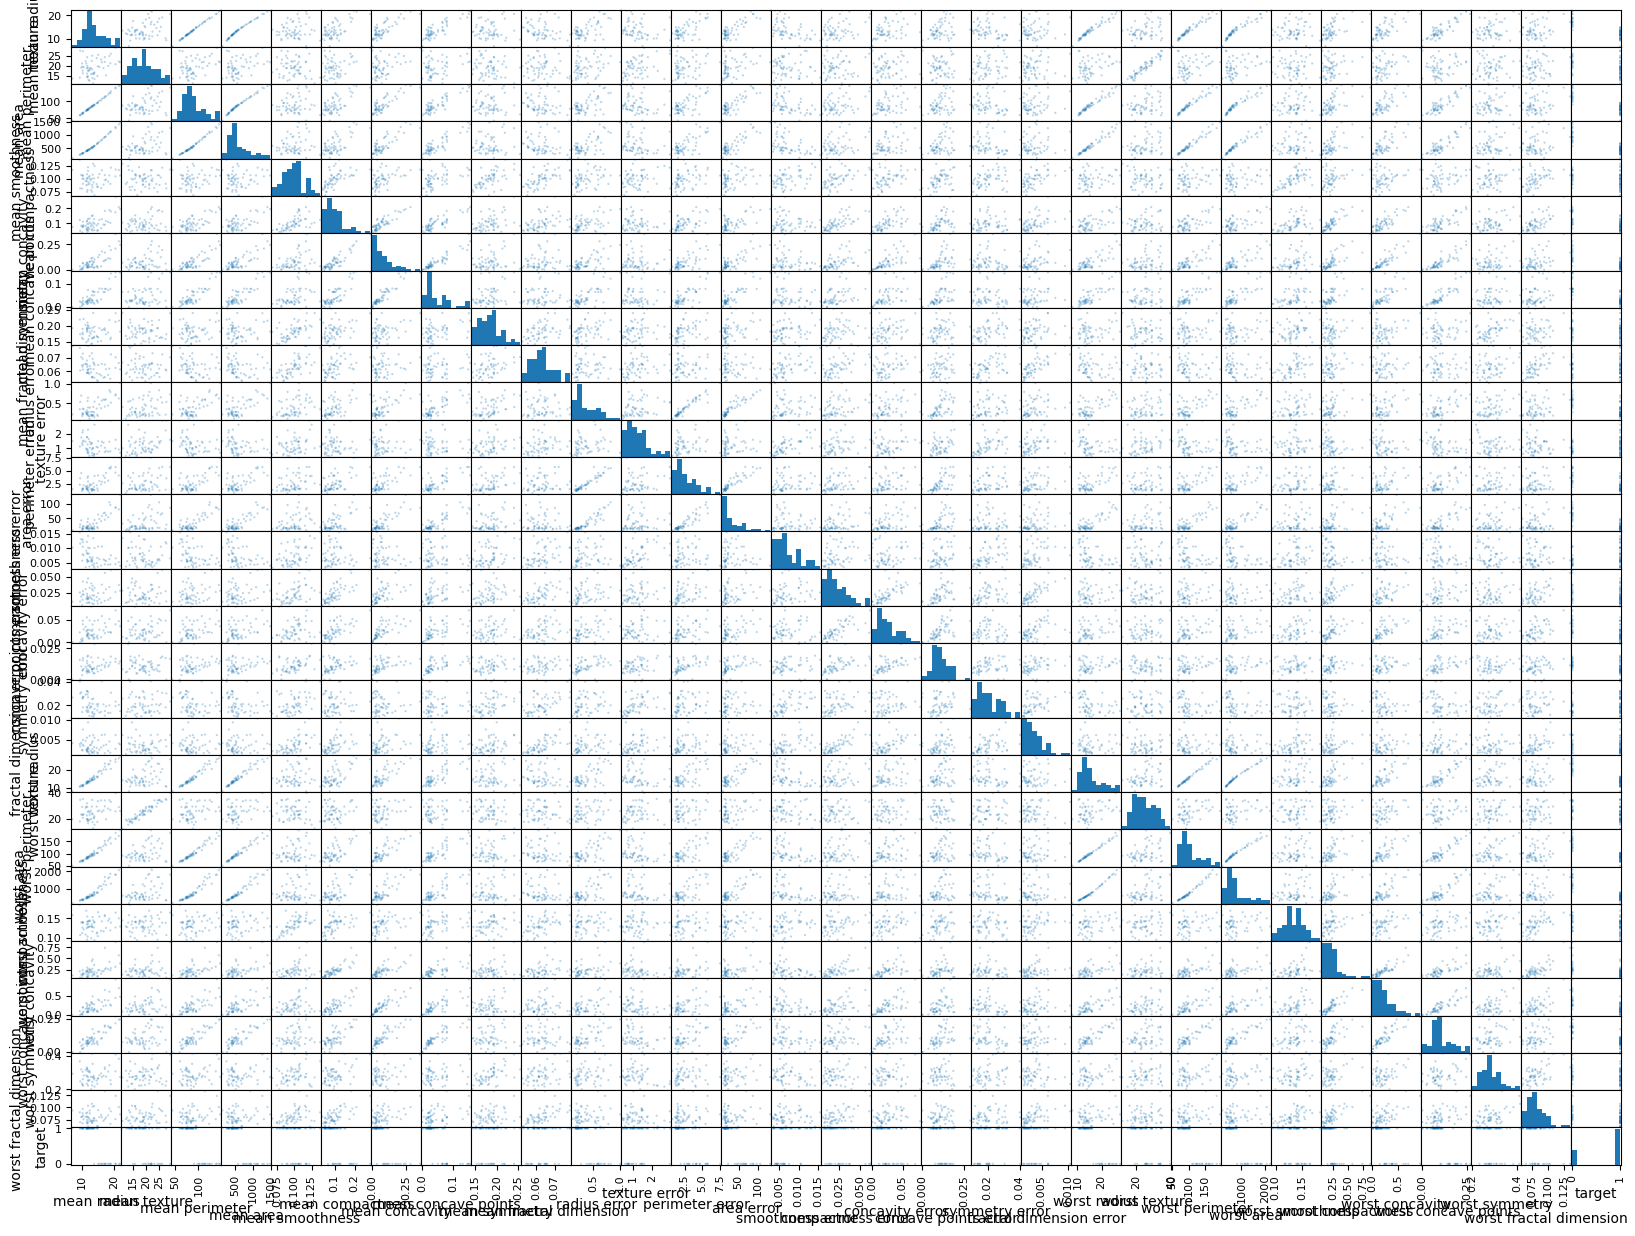

In [68]:
scatter_matrix(df.sample(frac=0.1, random_state=42), figsize=(20, 15), diagonal='hist', alpha=0.3, s=10)
plt.show()

Как можно заметить, признаки нормально распределены

Разделим данные на входные и выходные значения

In [69]:
df.fillna('0', inplace=True)
X = df.drop(['target'], axis=1)
Y = df['target']

X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Создадим набор с дополнительным признаком, представляющим собой сумму части негативных величин 

In [70]:
X_extra = X
Y_extra = Y
X_extra["worst"] = X_extra["worst smoothness"] + X_extra["worst concavity"] + X_extra["worst concave points"] + X_extra["worst fractal dimension"]

X_with_new_atribbute = df.drop(['target'], axis=1)
Y_with_new_atribbute = df['target']

Используем масштабирование для обоих наборов данных. 

In [78]:
scaler = MinMaxScaler(feature_range = (0, 1))
X_scaled = scaler.fit_transform(X)
Y = np.array(Y)
Y = Y.reshape(-1, Y.shape[0])       
Y_scaled = Y                       

X_with_new_atribbute_scaled = scaler.fit_transform(X_with_new_atribbute)
Y_with_new_atribbute = np.array(Y_with_new_atribbute)
Y_with_new_atribbute = Y_with_new_atribbute.reshape(-1, Y_with_new_atribbute.shape[0])
Y_with_new_atribbute_scaled = Y_with_new_atribbute



Разобъём выборку на обучающую, тестовую и валидационную в отношении 60/20/20 %

In [80]:
Y_scaled.shape

(569, 1)

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.4, random_state=42)
X_test, X_dev, Y_test, Y_dev = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)

Создадим одномерную сверточная сеть и полносвязную модель для последующего обучения

In [82]:
model_dense = Sequential()
model_dense.add(Input(shape=(X_train.shape[1],)))
model_dense.add(Dense(128, activation='relu'))
model_dense.add(Dense(64, activation='relu'))
model_dense.add(Dense(1, activation='sigmoid'))

model = Sequential()
model.add(Input(shape=(1, X_train.shape[1])))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



X_train, X_test, Y_train, Y_test = train_test_split(X_with_new_atribbute_scaled, Y_with_new_atribbute_scaled, test_size=0.4, random_state=32)
X_test, X_dev, Y_test, Y_dev = train_test_split(X_test, Y_test, test_size=0.5, random_state=32)

model_dense_2 = Sequential()
model_dense_2.add(Input(shape=(X_train.shape[1],)))
model_dense_2.add(Dense(128, activation='relu'))
model_dense_2.add(Dense(64, activation='relu'))
model_dense_2.add(Dense(1, activation='sigmoid'))

model_2 = Sequential()
model_2.add(Input(shape=(1, X_train.shape[1])))
model_2.add(Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'))
model_2.add(MaxPooling1D(pool_size=1))
model_2.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
model_2.add(MaxPooling1D(pool_size=1))
model_2.add(Flatten())
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.4, random_state=42)
X_test, X_dev, Y_test, Y_dev = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)
labels = [0, 1]
X_test.shape

(114, 31)

In [84]:
print(np.unique(Y_dev, return_counts=True))

(array([0, 1], dtype=int64), array([38, 76], dtype=int64))


In [85]:
model_dense.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model_dense.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=0, validation_data=(X_dev, Y_dev))
mse = model_dense.evaluate(X_test, Y_test)
predicted = model_dense.predict(X_test)
predicted_classes = (predicted > 0.5).astype(int)
print(f'Dense, stand mse: {mse[0]}, balansed accurancy: {balanced_accuracy_score(Y_test, predicted_classes)}')


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1])), Y_train, epochs=50, batch_size=32, verbose=0, validation_data=(np.reshape(X_dev, (X_dev.shape[0], 1, X_dev.shape[1])), Y_dev))
mse = model.evaluate(np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1])), Y_test)
predicted = model.predict(np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1])))
predicted_classes = (predicted > 0.5).astype(int)
print(f'Conv, stand mse: {mse[0]}, balanced accurancy: {balanced_accuracy_score(Y_test, predicted_classes)}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9815 - loss: 0.0557 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Dense, stand mse: 0.06742947548627853, balansed accurancy: 0.9761904761904762
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9728 - loss: 0.0558 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Conv, stand mse: 0.07108911871910095, balanced accurancy: 0.9642857142857143


In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(X_with_new_atribbute_scaled, Y_with_new_atribbute_scaled, test_size=0.4, random_state=42)
X_test, X_dev, Y_test, Y_dev = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)

model_dense_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model_dense_2.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=0, validation_data=(X_dev, Y_dev))
mse = model_dense_2.evaluate(X_test, Y_test)
predicted = model_dense_2.predict(X_test)
predicted_classes = (predicted > 0.5).astype(int)
print(f'Dense, stand, extra mse: {mse[0]}, accurancy: {balanced_accuracy_score(Y_test, predicted_classes)}')


model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model_2.fit(np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1])), Y_train, epochs=50, batch_size=32, verbose=0, validation_data=(np.reshape(X_dev, (X_dev.shape[0], 1, X_dev.shape[1])), Y_dev))
mse = model_2.evaluate(np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1])), Y_test)
predicted = model_2.predict(np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1])))
predicted_classes = (predicted > 0.5).astype(int)
print(f'Conv, stand, extra mse: {mse[0]}, balanced accurancy: {balanced_accuracy_score(Y_test, predicted_classes)}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9728 - loss: 0.0477 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Dense, stand, extra mse: 0.057707108557224274, accurancy: 0.9692460317460317
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9878 - loss: 0.0400 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Conv, stand, extra mse: 0.05477235093712807, balanced accurancy: 0.9811507936507937


In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)
X_test, X_dev, Y_test, Y_dev = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)

model_dense.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model_dense.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=0, validation_data=(X_dev, Y_dev))
mse = model_dense.evaluate(X_test, Y_test)
predicted = model_dense.predict(X_test)
predicted_classes = (predicted > 0.5).astype(int)
print(f'Dense mse: {mse[0]}, balanced accurancy: {balanced_accuracy_score(Y_test, predicted_classes)}')


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1])), Y_train, epochs=50, batch_size=32, verbose=0, validation_data=(np.reshape(X_dev, (X_dev.shape[0], 1, X_dev.shape[1])), Y_dev))
mse = model.evaluate(np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1])), Y_test)
predicted = model.predict(np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1])))
predicted_classes = (predicted > 0.5).astype(int)
print(f'Conv mse: {mse[0]}, balanced accurancy: {balanced_accuracy_score(Y_test, predicted_classes)}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9909 - loss: 0.3242 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Dense mse: 0.6011394262313843, balanced accurancy: 0.9761904761904762
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9616 - loss: 0.1710 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Conv mse: 0.20332388579845428, balanced accurancy: 0.9404761904761905


In [88]:
X_train, X_test, Y_train, Y_test = train_test_split(X_with_new_atribbute, Y_with_new_atribbute, test_size=0.4, random_state=42)
X_test, X_dev, Y_test, Y_dev = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)

model_dense_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model_dense_2.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=0, validation_data=(X_dev, Y_dev))
mse = model_dense_2.evaluate(X_test, Y_test)
predicted = model_dense_2.predict(X_test)
predicted_classes = (predicted > 0.5).astype(int)
print(f'Dense, extra mse: {mse[0]}, balanced accurancy: {balanced_accuracy_score(Y_test, predicted_classes)}')


model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model_2.fit(np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1])), Y_train, epochs=50, batch_size=32, verbose=0, validation_data=(np.reshape(X_dev, (X_dev.shape[0], 1, X_dev.shape[1])), Y_dev))
mse = model_2.evaluate(np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1])), Y_test)
predicted = model_2.predict(np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1])))
predicted_classes = (predicted > 0.5).astype(int)
print(f'Conv, extra mse: {mse[0]}, balanced accurancy: {balanced_accuracy_score(Y_test, predicted_classes)}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9585 - loss: 0.3563 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Dense, extra mse: 0.3494264483451843, balanced accurancy: 0.9603174603174602
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9529 - loss: 0.1540 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Conv, extra mse: 0.18085552752017975, balanced accurancy: 0.9285714285714286


Лучший результат показала сверточная модель c масштабированием и с дополнительными признаками. Выполним Grid поиск гиперпараметров для неё 

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_with_new_atribbute_scaled, Y_with_new_atribbute_scaled, test_size=0.4, random_state=42)
X_test, X_dev, y_test, y_dev = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

Deg = [2,3,4,5,6,7]
res = []
res_r2 = []
names = []
for deg in Deg:
    model = Sequential()
    model.add(Input(shape=(1, X_train.shape[1])))
    model.add(Conv1D(filters=2**deg, kernel_size=3, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Conv1D(filters=2**(deg-1), kernel_size=3, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1])), Y_train, epochs=50, batch_size=32, verbose=0, validation_data=(np.reshape(X_dev, (X_dev.shape[0], 1, X_dev.shape[1])), Y_dev))
    rmse = model.evaluate(np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1])), Y_test)
    predicted = model.predict(np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1])))
    predicted_classes = (predicted > 0.5).astype(int)
    acc = balanced_accuracy_score(Y_test, predicted_classes)
    res.append(rmse)
    res_r2.append(acc)
    names.append(deg)
    print("Deg = ", deg)
    print("CC = ", rmse)
    print("Acc = ", acc, "\n-----------------")
print ("CCs: ", res)
print ("Names: ", names)
print ("Accs: ", res_r2)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6276 - loss: 0.6604 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Deg =  2
CC =  [0.6585060954093933, 0.6315789222717285]
Acc =  0.5 
-----------------
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9878 - loss: 0.0452 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Deg =  3
CC =  [0.052590228617191315, 0.9824561476707458]
Acc =  0.9811507936507937 
-----------------
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9878 - loss: 0.0434 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Deg =  4
CC =  [0.049697816371917725, 0.9824561476707458]
Acc =  0.9811507936507937 
-----------------
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9815 - loss: 0.0378 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Deg =  5
CC =  [0.049064185470342636, 0.9824561476707458]
Acc =  0.9761904761904762 
-----------------
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9878 - loss: 0.0426 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Deg =  6
CC =  [0.05373939871788025, 0.9824561476707458

Лучший результат при количестве нейронов: 128 и 64 в первом и втором слоях соответсвенно

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_with_new_atribbute_scaled, Y_with_new_atribbute_scaled, test_size=0.4, random_state=42)
X_test, X_dev, y_test, y_dev = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
Epohs = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
res = []
res_r2 = []
names = []
for ep in Epohs:
    model = Sequential()
    model.add(Input(shape=(1, X_train.shape[1])))
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1])), Y_train, epochs=ep, batch_size=32, verbose=0, validation_data=(np.reshape(X_dev, (X_dev.shape[0], 1, X_dev.shape[1])), Y_dev))
    rmse = model.evaluate(np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1])), Y_test)
    predicted = model.predict(np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1])))
    predicted_classes = (predicted > 0.5).astype(int)
    acc = balanced_accuracy_score(Y_test, predicted_classes)
    res.append(rmse)
    res_r2.append(acc)
    names.append(ep)
    print("Epohs = ", ep)
    print("CC = ", rmse)
    print("Acc = ", acc, "\n-----------------")
print ("CCs: ", res)
print ("Names: ", names)
print ("Accs: ", res_r2)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9641 - loss: 0.0800 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Epohs =  10
CC =  [0.0813375860452652, 0.9649122953414917]
Acc =  0.9623015873015872 
-----------------
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9878 - loss: 0.0490 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Epohs =  20
CC =  [0.0546671561896801, 0.9824561476707458]
Acc =  0.9811507936507937 
-----------------
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9878 - loss: 0.0398 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Epohs =  30
CC =  [0.05099530890583992, 0.9824561476707458]
Acc =  0.9811507936507937 
-----------------
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9878 - loss: 0.0403 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Epohs =  40
CC =  [0.05428954213857651, 0.9824561476707458]
Acc =  0.9811507936507937 
-----------------
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9815 - loss: 0.0487 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Epohs =  50
CC =  [0.06549210101

Лучший результат при количестве эпох, равном 100

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_with_new_atribbute_scaled, Y_with_new_atribbute_scaled, test_size=0.4, random_state=42)
X_test, X_dev, y_test, y_dev = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
Opts = ['adam', 'SGD', 'Adamax']
res = []
res_r2 = []
names = []
for op in Opts:
    model = Sequential()
    model.add(Input(shape=(1, X_train.shape[1])))
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=op, loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1])), Y_train, epochs=50, batch_size=32, verbose=0, validation_data=(np.reshape(X_dev, (X_dev.shape[0], 1, X_dev.shape[1])), Y_dev))
    rmse = model.evaluate(np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1])), Y_test)
    predicted = model.predict(np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1])))
    predicted_classes = (predicted > 0.5).astype(int)
    acc = balanced_accuracy_score(Y_test, predicted_classes)
    res.append(rmse)
    res_r2.append(acc)
    names.append(op)
    print("Ops = ", op)
    print("CC = ", rmse)
    print("Acc = ", acc, "\n-----------------")
print ("CCs: ", res)
print ("Names: ", names)
print ("Accs: ", res_r2)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9878 - loss: 0.0505 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Ops =  adam
CC =  [0.06173614785075188, 0.9824561476707458]
Acc =  0.9811507936507937 
-----------------
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7813 - loss: 0.5192 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Ops =  SGD
CC =  [0.5204559564590454, 0.7631579041481018]
Acc =  0.6785714285714286 
-----------------
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9728 - loss: 0.0545 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Ops =  Adamax
CC =  [0.058672286570072174, 0.9736841917037964]
Acc =  0.9692460317460317 
-----------------
CCs:  [[0.06173614785075188, 0.9824561476707458], [0.5204559564590454, 0.7631579041481018], [0.058672286570072174, 0.9736841917037964]]
Names:  ['adam', 'SGD', 'Adamax']
Accs:  [0.9811507936507937, 0.6785714285714286, 0.9692460317460317]


Лучший результат у оптимизатора adam

Итоговая сверточная модель без стандартизации и датасетом с дополнительным признаком и следующими гиперпараметрами:
- 128, 64 нейронов в первом и втором слоях соответсвенно
- Оптимизатор Adam
- Количество эпох 100

Выполним прогнозирования для модели с лучшими параметрами:

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_with_new_atribbute_scaled, Y_with_new_atribbute_scaled, test_size=0.4, random_state=42)
X_test, X_dev, y_test, y_dev = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

model = Sequential()
model.add(Input(shape=(1, X_train.shape[1])))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=op, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1])), Y_train, epochs=100, batch_size=4, verbose=0, validation_data=(np.reshape(X_dev, (X_dev.shape[0], 1, X_dev.shape[1])), Y_dev))
rmse = model.evaluate(np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1])), Y_test)
predicted = model.predict(np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1])))
predicted_classes = (predicted > 0.5).astype(int)
acc = balanced_accuracy_score(Y_test, predicted_classes)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9822 - loss: 0.0388 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [94]:
print(rmse, acc)

[0.061376266181468964, 0.9736841917037964] 0.9742063492063492


Лучшая точность данной модели:
- Balanced accurancy: 0.9742
- BC: 0.0613
- Accuracy: 0.9736